## **DATA DRIVEN ANALYSIS - CORRELATION BETWEEN LIFE EXPECTANCY, SOCIAL SUPPORT AND HAPPINESS INDEX**

### PROJECT SUMMARY

This study explores the relationships between life expectancy, social support, and the happiness index across countries. The primary goal is to determine whether social support and happiness scores influences the life expectancy of populations.

The findings from this analysis could help pinpoint areas where interventions would be most impactful, such as strengthening community support systems or implementing policies designed to enhance societal happiness.

By examining these critical factors, this analysis provides valuable insights into the determinants of life expectancy. The results have practical implications for improving global health outcomes and can contribute meaningfully to both academic research and the development of effective policy frameworks.


# **DATA LOADING**

The data for this analysis was sourced from multiple platforms:
To enhance the readability and interpretability of the dataset, the column names were renamed for better understanding.

The shape of the life expectancy dataset was examined to understand its structure and dimensions. A closer inspection using head() and tail() revealed that the first 48 rows consisted of aggregated data for regional groups, such as the Arab World, Caribbean small states, and other country groupings defined by the World Bank. Since this data did not pertain to individual countries, it was deemed irrelevant for the analysis and was removed.

Additionally, any rows containing null values were excluded to ensure the dataset was clean and complete, avoiding potential issues during analysis. This step helped maintain the integrity of the results by eliminating incomplete records.for life expectancy was used to extract the data directly through the API.
Happiness and Social Support Data: Sourced from Kaggle, this dataset was uploaded to a GitHub repository for easier access and was subsequently pulled into the project using its direct URL.
This multi-source approach ensured the availability of comprehensive and reliable data for the study.

In [30]:
import pandas as pd
import pandas_datareader
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Check if pandas version is 0.23
if pd.__version__.startswith('0.23'):
    core.common.is_list_like = api.types.is_list_like

from pandas_datareader.wb import download

# Set variables
YEAR = 2019
LE_INDICATOR = 'SP.DYN.LE00.IN'
happiness_url = 'https://raw.githubusercontent.com/ilakkiya-v/project-sen/refs/heads/main/happiness.csv'

# Download data using pandas_datareader and reset the index
life_data = download(indicator = LE_INDICATOR, country = 'all', start = YEAR, end = YEAR).reset_index()
happiness_data = pd.read_csv(happiness_url)

In [32]:
life_data.head()

,country,year,SP.DYN.LE00.IN
0,Africa Eastern and Southern,2019,63.754752
1,Africa Western and Central,2019,57.500295
2,Arab World,2019,71.688418
3,Caribbean small states,2019,72.359231
4,Central Europe and the Baltics,2019,77.265533


In [34]:
happiness_data.head()

,country,happiness,Social support
0,Afghanistan,3.203,0.517
1,Albania,4.719,0.848
2,Algeria,5.211,1.160
3,Argentina,6.086,1.432
4,Armenia,4.559,1.055


# **DATA CLEANING**

To enhance the readability and interpretability of the dataset, the column names were renamed for better understanding.

The shape of the life expectancy dataset was examined to understand its structure and dimensions. A closer inspection using head() and tail() revealed that the first 48 rows consisted of aggregated data for regional groups, such as the Arab World, Caribbean small states, and other country groupings defined by the World Bank. Since this data did not pertain to individual countries, it was deemed irrelevant for the analysis and was removed.

Additionally, any rows containing null values were excluded to ensure the dataset was clean and complete, avoiding potential issues during analysis. This step helped maintain the integrity of the results by eliminating incomplete records.

In [37]:
print("shape of population table: ",life_data.shape)
print("shape of literacy table: ",happiness_data.shape)

shape of population table:  (266, 3)
shape of literacy table:  (156, 3)


In [39]:
life_data.rename(columns={'SP.DYN.LE00.IN': 'life'}, inplace=True)
life_data.drop('year', axis=1, inplace=True)
print("Columns of population table:", life_data.columns)
print("Columns of literacy table:", happiness_data.columns)

Columns of population table: Index(['country', 'life'], dtype='object')
Columns of literacy table: Index(['country', 'happiness', 'Social support'], dtype='object')


In [41]:
life_data.head(50)

,country,life
0,Africa Eastern and Southern,63.754752
1,Africa Western and Central,57.500295
2,Arab World,71.688418
3,Caribbean small states,72.359231
4,Central Europe and the Baltics,77.265533
5,Early-demographic dividend,70.985650
6,East Asia & Pacific,76.787310
7,East Asia & Pacific (excluding high income),75.992673
8,East Asia & Pacific (IDA & IBRD countries),76.027483
9,Euro area,82.283096


In [54]:
#removing the first 49 values and removing NA values from the rest of the data
life_data = life_data[49:].dropna()
happiness_data = happiness_data.dropna()

print("Shape of life expectancy table: ",life_data.shape)
print("Shape of happiness score table: ",happiness_data.shape)

Shape of life expectancy table:  (160, 2)
Shape of happiness score table:  (156, 3)


In [56]:
life_data.head()

,country,life
102,Denmark,81.45122
103,Djibouti,63.08500
104,Dominica,73.55900
105,Dominican Republic,73.57700
106,Ecuador,77.29700


# **DATA WRANGLING**

To prepare the dataset for analysis and visualization, the data sources were merged to create a comprehensive and unified dataset. This step ensured that all relevant variables were consolidated for accurate comparisons and insights.

The life column, which represents life expectancy, was converted into a numeric format to facilitate further processing. This conversion allowed for the creation of categorical groupings based on life expectancy, which were used to enhance the visualization and interpretation of the data. This approach provided a clearer understanding of patterns and trends in the dataset.

In [59]:
# Merge the result with Happiness data on 'country'
merged_data = pd.merge(life_data, happiness_data, on='country')

merged_data.head()

,country,life,happiness,Social support
0,Denmark,81.451220,7.600,1.573
1,Dominican Republic,73.577000,5.425,1.401
2,Ecuador,77.297000,6.028,1.312
3,El Salvador,72.559000,6.253,1.242
4,Estonia,78.646341,5.893,1.528


In [61]:
merged_data.shape

(100, 4)

In [63]:
merged_data['life'] = pd.to_numeric(merged_data['life'], errors='coerce')

print(merged_data.head())

# Create categorical groupings for Healthy Life Expectancy
merged_data['life_cat'] = pd.cut(merged_data['life'], bins=3,labels=['Low', 'Medium', 'High'])

              country       life  happiness  Social support
0             Denmark  81.451220      7.600           1.573
1  Dominican Republic  73.577000      5.425           1.401
2             Ecuador  77.297000      6.028           1.312
3         El Salvador  72.559000      6.253           1.242
4             Estonia  78.646341      5.893           1.528


In [80]:
merged_data.to_csv('final-wrangled.csv', index=False)


# **DATA ANALYSIS**


To assess the relationships between the variables, the correlation factors were calculated for each pair of factors. The analysis revealed strong correlations:

The correlation between life expectancy and happiness score,
Between life expectancy and social support, and
Between happiness score and social support,
all exceeded a value of 0.7. These strong positive correlations validate the focus of the study and indicate that the selected variables are closely related.

Next, the analysis examined the top 10 and bottom 10 countries based on happiness scores.

It is noteworthy that all the top 10 countries with a high happiness index also exhibit high life expectancy, without any exceptions.
Conversely, none of the bottom 10 countries with low happiness scores have high life expectancy. All these countries fall into the low or medium-low life expectancy categories, reinforcing the observed relationships between happiness and longevity.

In [66]:
from scipy.stats import pearsonr


correlation, p_value = pearsonr(merged_data['life'], merged_data['happiness'])
print(f"Correlation between Happiness Score and life expectancy: {correlation:.3f}")

correlation, p_value = pearsonr(merged_data['life'], merged_data['Social support'])
print(f"Correlation between Social Support and life expectancy: {correlation:.3f}")

correlation, p_value = pearsonr(merged_data['happiness'], merged_data['Social support'])
print(f"Correlation between Social Support and Happiness Score: {correlation:.3f}")

# Determine the top 10 countries with the highest happiness scores
top_10_happiness = merged_data.sort_values(by='happiness', ascending=False).head(10)
print("\nTop 10 Countries with the Highest Happiness Scores:")
print(top_10_happiness.head(10))

# Determine the bottom 10 countries with the highest happiness scores
top_10_happiness = merged_data.sort_values(by='happiness', ascending=True).head(10)
print("\nTop 10 Countries with the Highest Happiness Scores:")
print(top_10_happiness.head(10))

Correlation between Happiness Score and life expectancy: 0.805
Correlation between Social Support and life expectancy: 0.722
Correlation between Social Support and Happiness Score: 0.799

Top 10 Countries with the Highest Happiness Scores:
        country       life  happiness  Social support life_cat
6       Finland  81.982927      7.769           1.587     High
0       Denmark  81.451220      7.600           1.573     High
61       Norway  82.958537      7.554           1.582     High
18      Iceland  83.163415      7.494           1.624     High
55  Netherlands  82.112195      7.488           1.522     High
84  Switzerland  83.904878      7.480           1.526     High
83       Sweden  83.109756      7.343           1.487     High
56  New Zealand  82.056098      7.307           1.557     High
23       Israel  82.804878      7.139           1.455     High
38   Luxembourg  82.639024      7.090           1.479     High

Top 10 Countries with the Highest Happiness Scores:
        countr

# **DATA VISUALISATION**


Here we plot 3 digrams:

1. ***LINEAR REGRESSION MODEL (scatterplot)***: As life expectancy increases, the happiness score also tends to increase. This suggests that countries with higher life expectancy generally report higher levels of happiness.

2. ***Boxplot***: Countries with 'High' life expectancy have a higher median happiness score compared to 'Medium' and 'Low' categories.

3. ***3D Scatterplot***: The points cluster towards higher values of all three variables, indicating that countries with higher life expectancy and happiness scores also tend to have stronger social support systems.


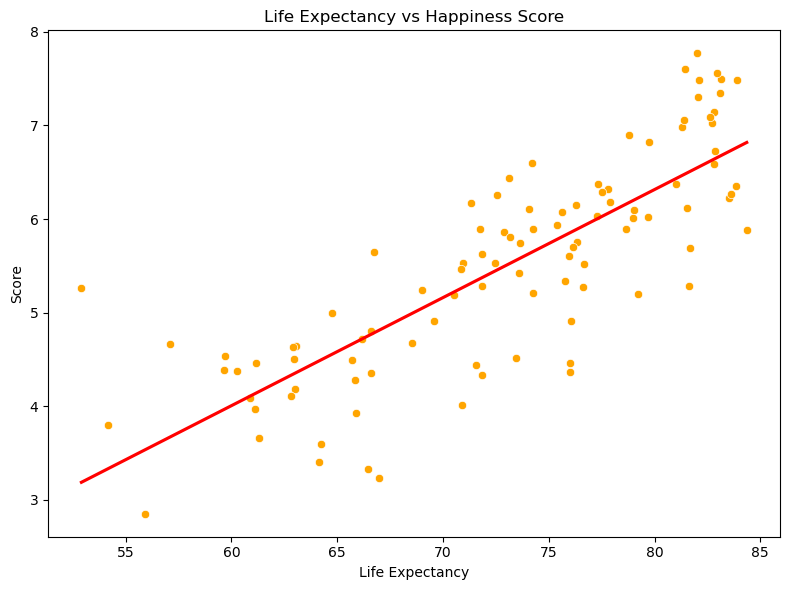

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with linear regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x='life', y='happiness', data=merged_data, color='orange')
sns.regplot(x='life', y='happiness', data=merged_data, scatter=False, color='red', ci=None)

# Plot customization
plt.title("Life Expectancy vs Happiness Score")
plt.xlabel("Life Expectancy")
plt.ylabel("Score")
plt.tight_layout()
plt.show()


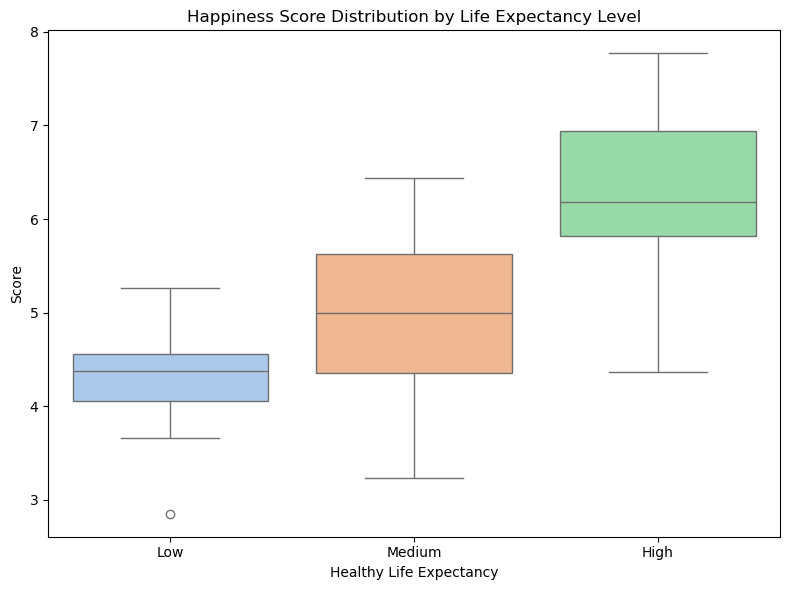

In [70]:
# Box plot of Happiness Scores by Life Expectancy Group
plt.figure(figsize=(8, 6))
sns.boxplot(x='life_cat', y='happiness', data=merged_data, palette='pastel')
plt.title("Happiness Score Distribution by Life Expectancy Level")
plt.xlabel("Healthy Life Expectancy")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

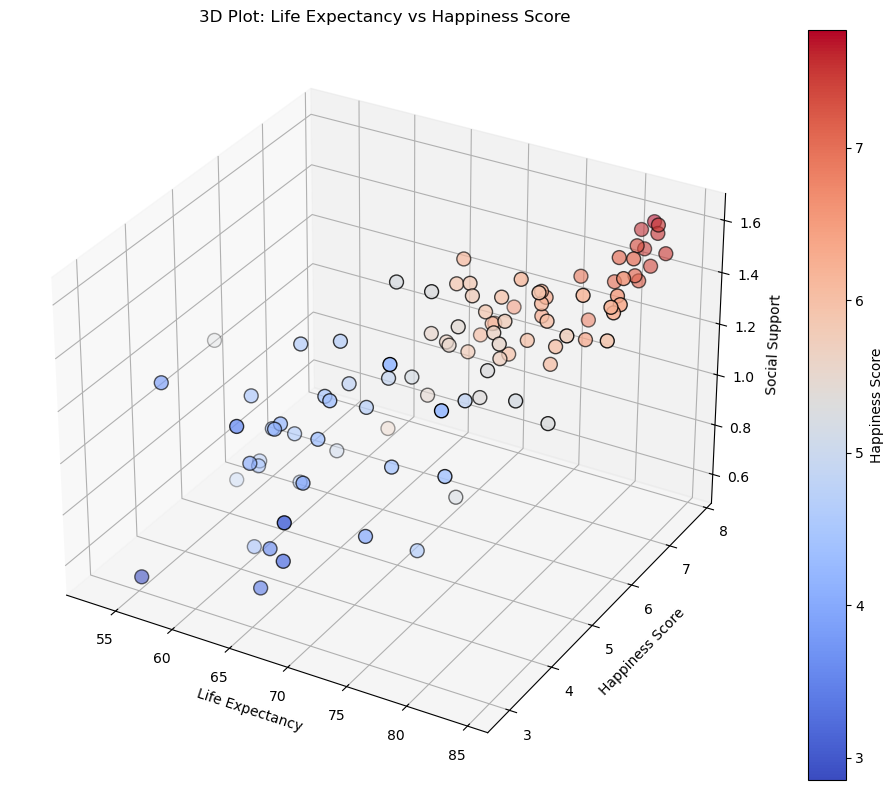

In [73]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(merged_data['life'], merged_data['happiness'], merged_data['Social support'],
                     c=merged_data['happiness'], cmap='coolwarm', s=100, edgecolor='k')
ax.set_title("3D Plot: Life Expectancy vs Happiness Score")
ax.set_xlabel("Life Expectancy")
ax.set_ylabel("Happiness Score")
ax.set_zlabel("Social Support")
fig.colorbar(scatter, ax=ax, label='Happiness Score')
plt.tight_layout()
plt.show()

**Future Improvements:**
1. Expand the analysis to include multiple years for a longitudinal perspective.
   
2. Incorporate additional variables like healthcare access and education levels.

**GITHUB LINK** 

https://github.com/senthil1814/Python-project

***DATA SOURCES***:
* Happiness score and social support: https://www.kaggle.com/datasets/unsdsn/world-happiness/data?select=2019.csv

* Life expectancy : https://data.worldbank.org/indicator/SP.DYN.LE00.IN

